In [68]:
import json
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [69]:
def extract_info(json_file):

    data_list = []
    # Charger le fichier JSON
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Parcourir chaque élément du JSON
    for img, info in data.items():
        # Diviser les informations en lignes en séparant par "\n"
        lines = info.split("\n")

        # Parcourir chaque ligne
        for line in lines:
            # Retirer les éléments vides résultant de la division
            elements = re.findall(r"[\S\s]*?(?=Ⓟ|Ⓞ|Ⓕ|Ⓜ|Ⓐ|Ⓒ|Ⓚ|Ⓑ|Ⓘ|Ⓗ|Ⓔ|$)", line)
            elements = [element.strip() for element in elements if element.strip()]
            target, nom, prenom, profession, lien, age, annee, nationalite, ville, biz = "", "", "", "", "", "", "", "", "", ""
            for element in elements:
                # Supprimer les logos de la colonne "nom"
                #element = element.replace('Ⓞ', '').replace('Ⓟ', '')  # Supprimer les logos Ⓞ et Ⓟ
                if 'Ⓟ' in element:
                    target=True
                    nom=element.replace('Ⓟ', '')
                elif 'Ⓞ' in element:
                    target=False
                    nom=element.replace('Ⓞ', '')
                elif 'Ⓕ' in element:
                    prenom=element.replace('Ⓕ', '')
                elif 'Ⓜ' in element:
                    profession=element.replace('Ⓜ', '')
                elif 'Ⓐ' in element:
                    age=element.replace('Ⓐ', '')
                elif 'Ⓚ' in element:
                    nationalite=element.replace('Ⓚ', '')
                elif 'Ⓑ' in element:
                    annee=element.replace('Ⓑ', '')
                elif 'Ⓘ' in element:
                    ville=element.replace('Ⓘ', '')
                elif 'Ⓗ' in element or 'Ⓒ' in element:
                    if 'Ⓛ' in element:
                        element=element.replace('Ⓗ', '').replace('Ⓒ', '')
                        lien=element.split('Ⓛ', 1)[0]
                    else:
                        lien=element.replace('Ⓗ', '').replace('Ⓒ', '') 
                elif 'Ⓔ' in element:
                    biz=element.replace('Ⓔ', '')

                    
            # Stocker les données dans un dictionnaire
            data_dict = {'Target': target, 'Nom': nom, 'Prenom': prenom, 'Profession': profession,
                            'Relation': lien, 'Age': age,'Année':annee, 'Nationalité': nationalite, 'Ville': ville, 'Plus':biz}
            # Ajouter le dictionnaire à la liste
            data_list.append(data_dict)

    return pd.DataFrame(data_list)

In [70]:
# Chemin vers le fichier JSON
json_file = "entities.json"

# Appeler la fonction pour extraire les informations et créer le dataset
df=extract_info(json_file)

df.head()

,Target,Nom,Prenom,Profession,Relation,Age,Année,Nationalité,Ville,Plus
0,False,Breton,Cyrille,menuisier,Garçon,25,,française,,
1,True,Ferazzi,Auguste,vitrier,Garçon,30,,Piémontaise,,
2,True,Machol,Pierre,vitrier,Garçon,24,,Piémontaise,,
3,True,Desbois,Alexandre,prop re,Homme marié,48,,française,,
4,False,Vignat,Zélie,prop re,sa fe,30,,française,,


## Data Exploration

In [71]:
df.shape

(25448, 10)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25448 entries, 0 to 25447
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Target       25448 non-null  object
 1   Nom          25448 non-null  object
 2   Prenom       25448 non-null  object
 3   Profession   25448 non-null  object
 4   Relation     25448 non-null  object
 5   Age          25448 non-null  object
 6   Année        25448 non-null  object
 7   Nationalité  25448 non-null  object
 8   Ville        25448 non-null  object
 9   Plus         25448 non-null  object
dtypes: object(10)
memory usage: 1.9+ MB


In [73]:
nb_empty = df[df.apply(lambda x: (x == "").all(), axis=1)]
print("Nombre de lignes vides :", nb_empty.shape)

Nombre de lignes vides : (373, 10)


In [74]:
# enlever les lignes vides
df= df[df.apply(lambda row: not all(row == ""), axis=1)]

### Variable cible: Target

In [75]:
df['Target'].value_counts()

Target
False    19159
True      5640
           276
Name: count, dtype: int64

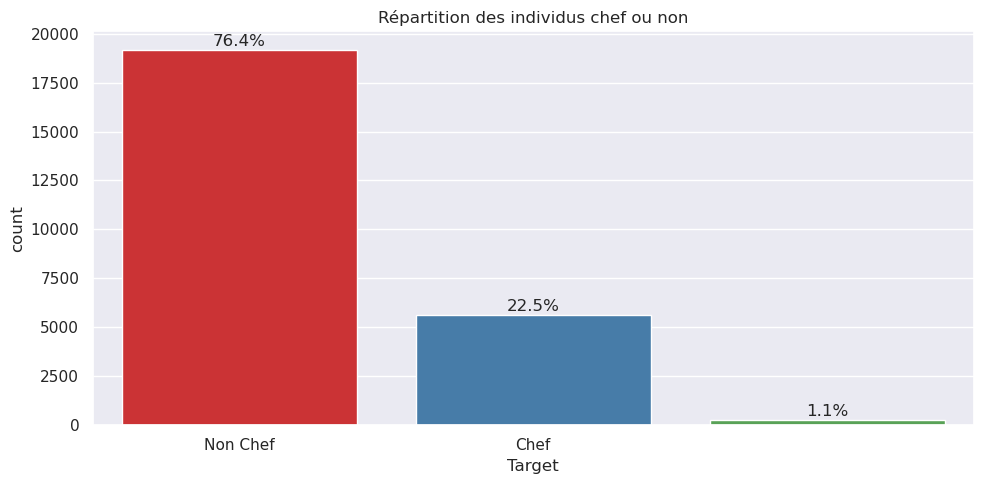

In [76]:
df['Target'] = df['Target'].replace({True: 'Chef', False: 'Non Chef'})
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Target", data=df, palette='Set1', hue='Target', legend=False)  
plt.title("Répartition des individus chef ou non")

total = len(df["Target"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

### Relation 

In [77]:
# Valeurs et Nombre de valeurs distinctes
print(df["Relation"].unique())
df["Relation"].nunique()

['Garçon' 'Homme marié' 'sa fe' 'Fille' 'Femme mariée' 'enfant' 'idem'
 'chef' 'femme' 'fille' '' 'épouse' 'domestique' 'fils' 'soeur' 'Veuve'
 'gendre du chef' 'fille du chef' 'mère du chef' 'père dy chef' 'ouvrier'
 'Veuf' 'petit fils' 'petite fille' 'neveu' 'nièce'
 'fille de la précédente' 'cousine' 'seule' 'mère' 'sa f' 'enft' 'famille'
 'gendre' 'Chef de ménage' 'sa fille' 'son fils' 'chef de ménage'
 'sa femme' 'Domestique' 'membre de famille' 'tante' 'frère'
 'Femme mariée ' 'Fille ' 'Garçon ' 'Veuf ' 'domest' 'beau-frère' 'époux'
 'b-soeur' 'pensionnaire' 'père' 'belle mère' 'Femme' 'belle fille'
 'sa fme' 'son gendre' 'son petit fils' 'sa mère' 'sa petite fille'
 'nourisson' 'belle sœur' 'bru' 'femme de chambre' 'petote fille'
 'sa domestique' 'chef ménage' 'sœur' 'jardinier' 'mécanicien'
 'cuisinière' 'valet de ch.' 'cocher' 'Chef' 'pour divers' 'leur fils'
 'son nourisson' 'leur fille' 'leur domestique' 'frère du chef de ménage'
 'leur mère' 'ch. d. m' 'ép.' 'ch. d . m' 'ep

527

In [78]:
# Étendue des valeurs, Équilibre
df["Relation"].value_counts()

Relation
chef                  2951
Fille                 2786
Garçon                2764
Homme marié           2102
Femme mariée          2077
                      ... 
petit fils du chef       1
oncle du chef            1
frère du gendre          1
filla                    1
prop re                  1
Name: count, Length: 527, dtype: int64

In [79]:
df['Target'] = df['Target'].replace({'Chef':True, 'Non Chef':False})

In [80]:
df[(df['Target']==False) & ((df['Relation'].str.startswith('ch'))|(df['Relation'].str.startswith('Ch')))]

,Target,Nom,Prenom,Profession,Relation,Age,Année,Nationalité,Ville,Plus
64,False,Chasles,Adolphe Jules Léon Sosthène,clerc de notaire,chef,,1855,française,Frazé - Eure et Loir,Bourgeois
73,False,Idem,Georges,emp. Banque,chef,,1896,idem,Blois,Natle crédit
249,False,Guybertier,Léon,ch de fer,chef,,1865,française,La Chatre,PO
353,False,Moysan,François,cultivateur,chef,,1867,française,idem,patron
452,False,Masson,Joseph,T. de pierres,Chef de ménage,43,,,,
...,...,...,...,...,...,...,...,...,...,...
25371,False,Gauthier,Auguste,prop cultivateur,chef de ménage,58,,,,
25374,False,Gillouin,Pierre,idem,chef de ménage,55,,,,
25378,False,Templier,Marie,idem,chef de ménage,40,,,,
25380,False,Chauvin,Louis Napoléon,idem,chef de ménage,27,,,,


### Age

In [81]:
# Valeurs et Nombre de valeurs distinctes
print(df["Age"].unique())
df["Age"].nunique()

['25' '30' '24' '48' '46' '49' '40' '11' '8' '5' '45' '23' '1' '22' '16'
 '20' '32' '3' '44' '21' '27' '2' '' '1867' '9' '4' '11 mois' '29' '39'
 '37' '75' '34' '50' '47' '18' '57' '6' '59' '2 mois' '33' '31' '5 mois'
 '65' '79' '52' '74' '36' '26' '35' '12' '7' '19' '68' '38' '73' '15' '10'
 '41' '63' '53' '55' '56' '70' '62' '13' '6 semaines' '19 mois' '71' '17'
 '72' '28' '69' '46 Ⓛm. Brasp' '46 Ⓛm' '78 Ⓛm' '56 Ⓛm' '42 Ⓛv' '30 Ⓛm'
 '20 Ⓛm' '49 Ⓛm' '45 Ⓛm' '7 mois' '66 Ⓛm St Ségal' '64 Ⓛm Dinéault'
 '32 ⓁSt Ségal' '28 Ⓛidem' '27 Ⓛidem' '54' '18 mois' '60' '14' '43' '77'
 '4 mois' '58' '61' '89' '10 mois' '42' '86' '80' '66' '87' '82' '51'
 '52 1⁇2' '3 1⁇2' '17 1⁇2' '1 1⁇2' '78' '67' '64' '7 jours' '76' '9 mois'
 '6 mois' '90' '1859' '1904' '92' '7 semaines' '8 mois' '2 ans et demi'
 '9 ans' '68 ans' '29 ans' '6 ans' '2 ans' '81 ans' '40 ans' '55 ans'
 '24 ans' '19 ans' '15 ans' '54 Ⓛ50' '21 Ⓛ51' '25 Ⓛ52' '26 Ⓛ53' '27 Ⓛ54'
 '12 Ⓛ55' '65 Ⓛ56' '32 Ⓛ57' '38 Ⓛ58' '37 Ⓛ59' '20 mois' '17 Ⓛ6

371

In [82]:
df['Age'].value_counts()

Age
             8639
2             334
8             329
18            328
6             322
             ... 
60 Ⓛ46          1
57 Ⓛ47          1
24 Ⓛ78348       1
1883            1
52 1⁇2          1
Name: count, Length: 371, dtype: int64

### Année

In [83]:
# Valeurs et Nombre de valeurs distinctes
print(df["Année"].unique())
df["Année"].nunique()

['' '1905' '1908' '1877' '1878' '1906' '1910' '1879' '1883' '1888' '1872'
 '1874' '1900' '1901' '1907' '1909' '1860' '1869' '1889' '1881' '1904'
 '1849' '1850' '1855' '1826' '1856' '1853' '1920' '1863' '1902' '1847'
 '1896' '1865' '1864' '1884' '1882' '1886' '1894' '1893' '1876' '1857'
 '1870' '1873' '1838' '1844' '1842' '1880' '1887' '1891' '1897' '1898'
 '1868' '1912' '1911' '1913' '1918' '1885' '1914' '1867' '1861' '1875'
 '1919' '1921' '1922' '1923' '1929' '1930' '1862' '1924' '1925' '1927'
 '1928' '1890' '1851' '1858' '1903' '1934' '1835' '1854' '1871' '1895'
 '1892' '1935' '1859' '1932' '1931' '1933' '1936' '1917' '1866' '1899'
 '1839' '1837' '18599' '1823' '1845' '1840' '1848' '4' '1843' '1915'
 '1926' '1836' '1832' '1852' '1831' '1830' '1829' '1846' '1828' '1841'
 '1824' '1916' '1827' '1820' '1794' '1821' '1784' '1812' '1833' '1978'
 '1991' '1834' '1?' 'Y1910' '1790' '1987' '1988' 'française' '31' '1938'
 '1765' '52' '49' '1977' '1940' '14' '7' '1966' '3 1/2 ans' '1809' '71'
 '

159

In [84]:
df['Année'].value_counts()

Année
         17731
1901       138
1905       133
1902       126
1903       124
         ...  
1822         1
1849i        1
70           1
5            1
65           1
Name: count, Length: 159, dtype: int64

### Profession

In [89]:
# Valeurs et Nombre de valeurs distinctes
print(df["Profession"].unique())
df["Profession"].nunique()

['menuisier' 'vitrier' 'prop re' ... 'm de foraine' 'rept com ce'
 'employé enregistrement']


2061

In [90]:
df['Profession'].value_counts()

Profession
                                8896
idem                            3694
cultivateur                     1021
néant                            919
s.p                              564
                                ... 
commis greffier                    1
employée de bureau                 1
employée assurances sociales       1
contre maitre                      1
cond au ch de fer                  1
Name: count, Length: 2061, dtype: int64